In [2]:
graph = {"1" : {"2" : 2, "3" : 2},
         "2" : {"3" : 1, "4":1, "5": 2},
         "3" : {"5" : 3},
          "4" : {"3":4},
          "5" : {}  } #adj list

In [3]:
class Queue():
    def __init__(self):
        self.stor = []
        
    def add(self, el):
        self.stor.append(el)
        
    def pop(self):
        return self.stor.pop(0)
    
    


In [4]:



def dijkstra_alg(graph, source): #parents, cost
    #init parents, cost tables
    
    parents = {source : None}
    costs  = {source : 0}
    
    #filling the costs
    
    for v in graph:
        if v not in costs:
            costs[v] = float("INF")
            
    
    
    
    que = Queue()
    que.add(source)
    
    while que.stor: #while q is not empty
        vertex = que.pop()
        
        for neigh in graph[vertex]:
            
            if (costs[vertex] + graph[vertex][neigh]) < costs[neigh]:
                costs[neigh] = costs[vertex] + graph[vertex][neigh]
                parents[neigh] = vertex
                que.add(neigh)
                
                
    return costs, parents
                
        
        
costs,parents = dijkstra_alg(graph,"1")
        
        
def recover_path(parents, finish):
    
    path = [finish]
    
    curr = finish
    
    while parents[curr] is not None:
        parent = parents[curr]
        path.append(parent)
        curr = parent
        
    
    
    return path[::-1]


recover_path(parents,"5")

['1', '2', '5']

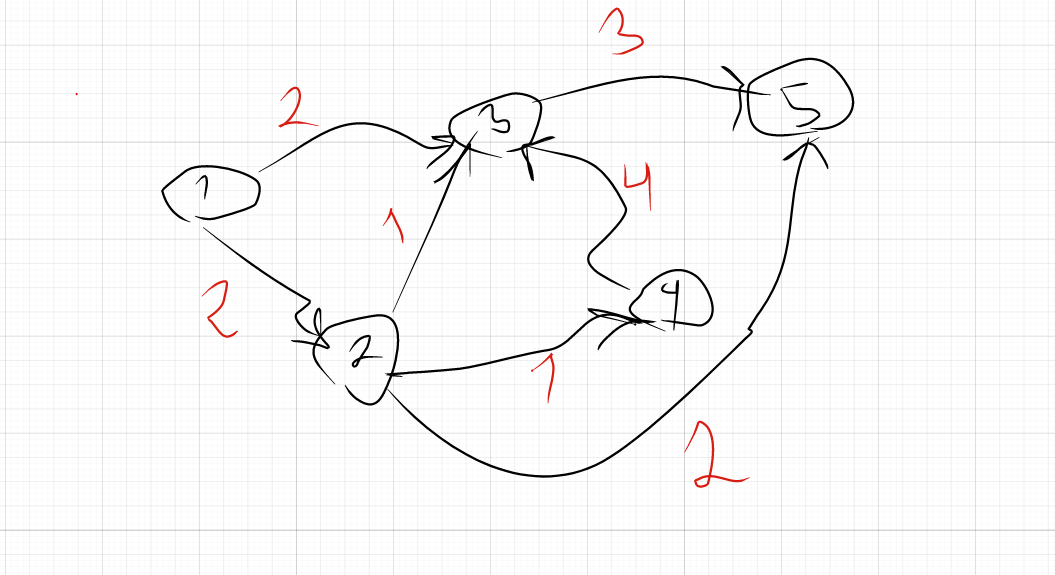

In [5]:
dijkstra_alg(graph, "1")

({'1': 0, '2': 2, '3': 2, '4': 3, '5': 4},
 {'1': None, '2': '1', '3': '1', '4': '2', '5': '2'})

In [6]:



def all_shortest_pairs(graph): #running Dijkstra for each possible source
    
    cost_matrix = {}
    parents_matrix = {}
    
    for source in graph:
        costs,parents  = dijkstra_alg(graph,source)
        
        cost_matrix[source] = costs
        parents_matrix[source] = parents

        
    
    return cost_matrix, parents_matrix


all_shortest_pairs(graph)
    

({'1': {'1': 0, '2': 2, '3': 2, '4': 3, '5': 4},
  '2': {'2': 0, '1': inf, '3': 1, '4': 1, '5': 2},
  '3': {'3': 0, '1': inf, '2': inf, '4': inf, '5': 3},
  '4': {'4': 0, '1': inf, '2': inf, '3': 4, '5': 7},
  '5': {'5': 0, '1': inf, '2': inf, '3': inf, '4': inf}},
 {'1': {'1': None, '2': '1', '3': '1', '4': '2', '5': '2'},
  '2': {'2': None, '3': '2', '4': '2', '5': '2'},
  '3': {'3': None, '5': '3'},
  '4': {'4': None, '3': '4', '5': '3'},
  '5': {'5': None}})

In [7]:
from math import sqrt

# You may use this function to test if a point lies inside given circle.
def ptInCircle(x,y, circles_list):
    for (xc,yc,rc) in circles_list:
        d = sqrt ( (x-xc)**2 + (y-yc)**2)
        if d <= rc:
            return True
    return False

def findPath(width, height, forbidden_circles_list):
    # width is a positive number
    # height is a positive number
    # forbidden_circles_list is a list of triples [(x1, y1, r1),..., (xk, yk, rk)]
    assert width >= 1
    assert height >= 1
    assert all(x <= width and x >=0 and y <= height and y >= 0 and r > 0 for (x,y,r) in forbidden_circles_list)
    # your code here
    

In [8]:

def generate_matrix(w, h):
    matrix =  []
    
    for i in range(h+1):
        line = []
        
        for j in range(w+1):
            line.append((i,j))
            
        matrix.append(line)
    
    
    return matrix


def make_graph(matrix, circle_list):
    
    adj_list = {}
    
    m = len(matrix)
    n = len(matrix[0])
    
    for i in range(m):
        for j in range(n):
            vertex = "({}, {})".format(i,j)
            
            
            if i < m-1 and not (ptInCircle(j, i+1, circle_list)):
                up_neigh = matrix[i+1][j]
            else:
                up_neigh = None
                
            if j < n-1 and not (ptInCircle(j+1, i, circle_list)):
                right_neigh = matrix[i][j+1]
            else:
                right_neigh = None
                
            adj_list[vertex] = { None if up_neigh is None else str(up_neigh)
                                , None if right_neigh is None else str(right_neigh)}
            
            
    #delete useless points
    
    for point in adj_list:
        if len(adj_list[point]) == 1 and None in adj_list[point]:
            adj_list[point] = None
            if point == "({}, {})".format(m-1, n-1):
                adj_list[point] = "FINISH"
    
    
    
    
    
    return adj_list
    
    



In [9]:
def bfs(graph, source):
    parents = {}
    distances = {}
    
    parents[source] = None
    distances[source] = 0
    
    que = Queue()
    que.add(source)
    
    
    while que.stor:
        vertex = que.pop()
        if graph[vertex] == "FINISH":
            continue
        
        if graph[vertex] is None:
            continue
            
        for n in graph[vertex]:
            if n is None:
                continue
                
            parents[n] = vertex
            distances[n] = distances[vertex] + 1
            que.add(n)
            
            
    return parents
        

    
    

def make_tuple(s):
    
    first_el = s[1]
    sec_el = s[4]
    
    return (int(first_el), int(sec_el))
    


def get_path(bfs_parents, finish):
    if finish not in bfs_parents:
        return []
    
    path = [finish]
    
    curr = bfs_parents[finish]
    
    while curr is not None:
        path.append(curr)
        curr = bfs_parents[curr]
        
    
    path = [make_tuple(s) for s in path]
        
        
    
    return path[::-1]




In [10]:
def findPath(width, height, forbidden_circles_list):
    #generate matrix
    
    matrix = generate_matrix(height, width)
    print(matrix)
    
    graph = make_graph(matrix, forbidden_circles_list)
    print(graph)
    parents = bfs(graph, "(0, 0)")
    
    print(parents)
    
    finish_coords = "({}, {})".format(width, height)
    print(finish_coords)
    
    path = get_path(parents, finish_coords)
    
    return path
    
    
    
circles = [(2,2,0.5), (1,2,1)]
p = findPath(3, 3, circles)



[[(0, 0), (0, 1), (0, 2), (0, 3)], [(1, 0), (1, 1), (1, 2), (1, 3)], [(2, 0), (2, 1), (2, 2), (2, 3)], [(3, 0), (3, 1), (3, 2), (3, 3)]]
{'(0, 0)': {'(0, 1)', '(1, 0)'}, '(0, 1)': {'(0, 2)', None}, '(0, 2)': {'(1, 2)', '(0, 3)'}, '(0, 3)': {'(1, 3)', None}, '(1, 0)': None, '(1, 1)': {'(1, 2)', None}, '(1, 2)': {'(1, 3)', None}, '(1, 3)': {None, '(2, 3)'}, '(2, 0)': {'(3, 0)', None}, '(2, 1)': None, '(2, 2)': {'(3, 2)', '(2, 3)'}, '(2, 3)': {'(3, 3)', None}, '(3, 0)': None, '(3, 1)': {'(3, 2)', None}, '(3, 2)': {'(3, 3)', None}, '(3, 3)': 'FINISH'}
{'(0, 0)': None, '(0, 1)': '(0, 0)', '(1, 0)': '(0, 0)', '(0, 2)': '(0, 1)', '(1, 2)': '(0, 2)', '(0, 3)': '(0, 2)', '(1, 3)': '(0, 3)', '(2, 3)': '(1, 3)', '(3, 3)': '(2, 3)'}
(3, 3)


In [26]:
class TreeNode:
    # Constructor for tree nodde
    def __init__(self, key, parent_node=None):
        self.key = key # set the key
        self.parent = parent_node # set the parent_node
        self.left = None # set the left child to None -- no left child to begin with
        self.right = None # set the right child to None - no right child to begin with.
    
    def is_root(self):
        return parent_node == None
    
    # Function: insert
    # insert a node with key `new_key` into the current tree.
    def insert(self, new_key):
        key = self.key 
        if new_key == key:
            print(f'Already inserted key {key}. Ignoring')
        elif new_key < key: # new_key must go into the left subtree
            if self.left == None: # no left child?
                new_node = TreeNode(new_key, self) # create one with self as parent
                self.left = new_node # set the left pointer
            else:
                self.left.insert(new_key) # recursively call insert on left subtree
        else:  # new_key must go into the right subtree.
            assert new_key > key
            if self.right == None: # no right child?
                new_node = TreeNode(new_key, self) # create one
                self.right = new_node
            else: 
                self.right.insert(new_key) # recusively call insert on right subtree.

def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node



In [35]:
class DFS():
    def __init__(self, root):
        self.seen = set()
        self.parents = {}
        self.leaves = []
        self.cost = {}
        
        parents[root] = None
        self.cost[root] = root.key
        
        
        
    def dfs_visit(self, node):
        
        if node in self.seen:
            return
    
    
        self.seen.add(node)
        
        if node.left is None and node.right is None:
            
            self.leaves.append(node)
            return
        
        
        for neigh in node.left,node.right :
            if neigh is None:
                continue
            
            self.parents[neigh] = node
            self.cost[neigh] = self.cost[node] + neigh.key
            self.dfs_visit(neigh)
            self.seen.add(neigh)
          
    def get_sums(self):
        sums = []
        
        for node in self.cost:
            #checking leave or not
            
            if node.left is None and node.right is None:
                cost = self.cost[node]
                sums.append(cost)
                
                
        return sums
    
    
        

In [38]:
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])

dfs = DFS(tree1)
dfs.dfs_visit(tree1)

dfs.get_sums()

[15, 57, 61, 50]

In [37]:
for k in dfs.cost:
    print(k.key, dfs.cost[k])

11 11
4 15
18 29
15 44
13 57
17 61
21 50


### Making good make tuple function 

In [52]:
def make_tuple(s):
    f_p, s_p = s.split(",")
    print(f_p, s_p)
    
    num1 = ""
    num2 = ""
    for l in f_p:
        if l.isdigit():
            print(l)
            num1 += l
    
    for l2 in s_p:
        if l2.isdigit():
            num2 += l2
            
    print(num1, num2)
            
    return (int(num2), int(num1))
    
    

s = "(12, 8)"



(12  8)
1
2
12 8


(8, 12)

In [46]:
"134".isdigit()

True

In [53]:
#previous
def make_tuple(s):
    
    first_el = s[1]
    sec_el = s[4]
    
    return (int(first_el), int(sec_el))[::-1]
    